# Ejercicio 6

## 1) 
Crea una función a la que se pase como input: un vector “x” de features distribuidos uniformemente, unos valores “a” y
“b” parámetros de un modelo lineal “y = a + b * x”, y parámetros “m” y “n” que nos den la sigma de una distribución
gaussiana: “sigma = m + n * x^2”. La función debe devolver una matriz que contenga en la primera columna un vector con
el término independiente “y = a + b * x + gauss(0, sigma = m + n * x^2)”, y en la segunda columna la “sigma = m + n *
x^2”. Nota: Este ejercicio es igual al que ya realizamos, salvo porque ahora la sigma del término estocástico depende de
cada punto.

In [1]:
generaY = function(x, a, b, m, n){
    sigma = m + n*x^2
    y = a + b*x + rnorm(x, mean = 0, sd = sigma)
    m = cbind(y, sigma)
    return(m)
}

## 2)
Crea una función que encuentre el valor de los parámetros que hace máximo el ML usando la fórmula análitica.

In [2]:
transPol1=function(x){
  xMatrix = cbind(rep(1, length(x)), x)
  return(xMatrix)
}
                  
parMaxLike = function(x,ys){
    y = ys[,1]
    sigma = ys[,2]
    X = transPol1(x)
    n = length(y)
    CovY = diag(x = sigma, nrow = n, ncol = n)
    theta = solve(t(X) %*% CovY %*% X) %*% (t(X) %*% CovY) %*% y
    return(theta)
}


## 3) 
Crea un vector x distribuido uniformemente en [0, 10], y encuentra el mínimo para a = 1, b = 2, m = 0.1 y n = 0.04. Pinta
los datos, sus errores y la recta de ajuste.

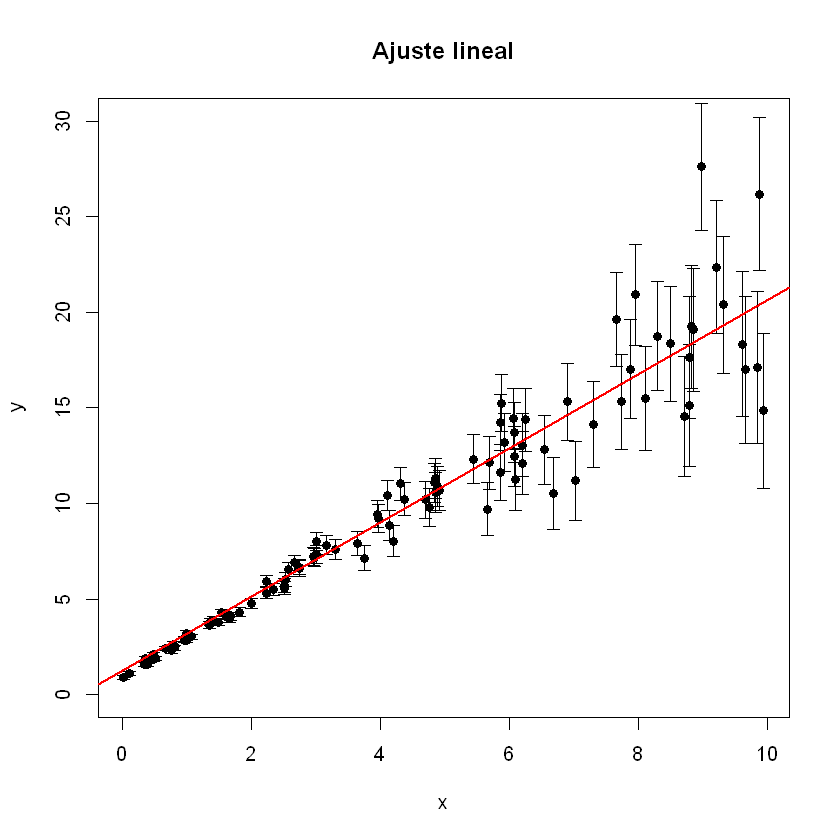

In [3]:
N = 100
a = 1
b = 2
m = 0.1
n = 0.04

# Generamos los datos
x = runif(N, 0, 10)
ysig = generaY(x,a,b,m,n)

# Hacemos el ajuste
theta = parMaxLike(x, ysig)

plot(x, ysig[,1], ylim = c(0,30), pch = 16,
    ylab = "y", xlab = "x",
    main = "Ajuste lineal")
arrows(x0 = x, y0 = ysig[,1]-ysig[,2], x1 = x, y1 = ysig[,1]+ysig[,2],
       code = 3, angle = 90, length = 0.05, col = "black")
abline(theta, col = "red", lwd = 2)

## 4) 
Genera un vector con 10000 numeros distribuidos exponencialmente con un valor de rate $= 1/5.27$. Crea un histograma con este vector usando como rango [0,30] y una anchura de bin = 1.

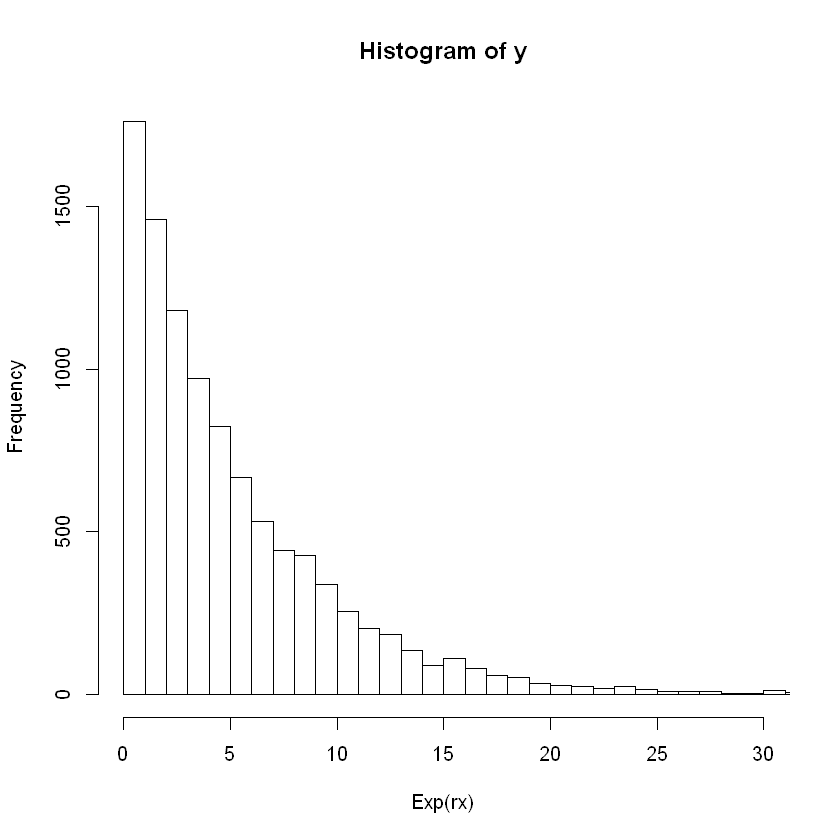

In [4]:
N = 10000
r = 1/5.27
y = rexp(N, r)
h = hist(y, xlim = c(0,30), breaks = 60, xlab = "Exp(rx)")

## 5)
Escribe una función que tome como input el valor “N” y “lambda” de una exponencial: “N * exp(-t/lambda)”, y calcula el
“l” asociado al valor del likelihood para este modelo y este histograma.

In [5]:
fl = function(N, lambda){
    n = h$counts
    t = h$breaks[-length(h$breaks)]
    l = -1 * sum(dpois(n, N*exp(-t/lambda), log = T))
    return(l)
}

In [6]:
l = fl(N, r)
l

[1] 219133.7

## 6)
Utiliza la función mle para hallar los valores de “N” y “lambda” que maximizan el likelihood. Usa como valores iniciales
4000 y 4. Pinta el histograma y la función exponencial ajustada.

In [7]:
library(stats4)

In [8]:
modelo = mle(fl, start = list(N = 4000, lambda = 4), method = 'BFGS')
summary(modelo)

Maximum likelihood estimation

Call:
mle(minuslogl = fl, start = list(N = 4000, lambda = 4), method = "BFGS")

Coefficients:
         Estimate  Std. Error
N      1641.33289 22.37229487
lambda    5.43137  0.05673653

-2 log L: 315.6537 

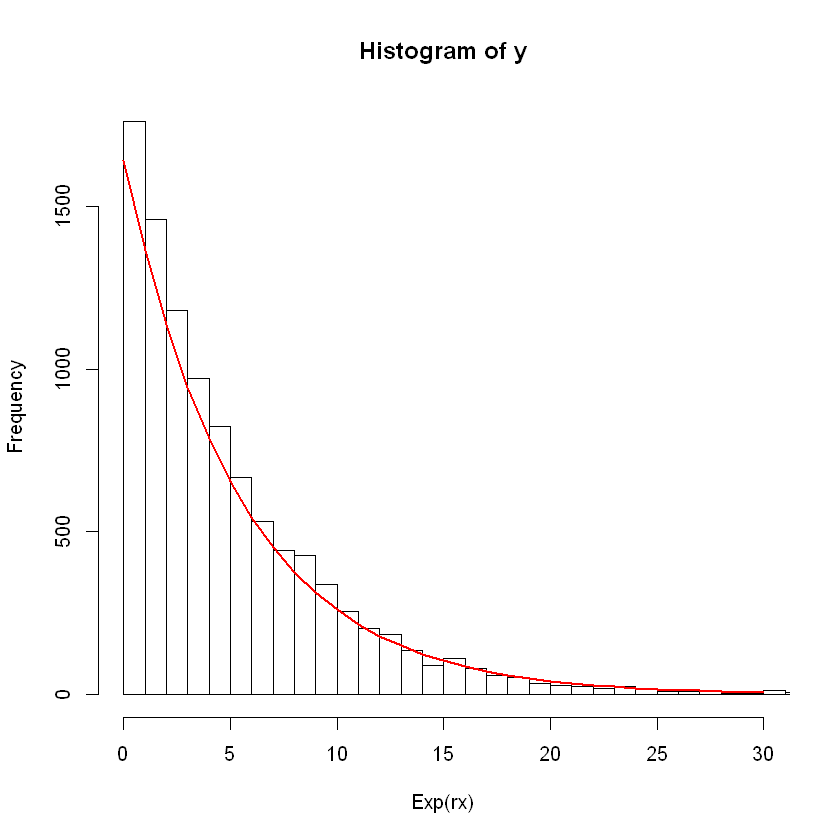

In [9]:
hist(y, xlim = c(0,30), breaks = 60, xlab = "Exp(rx)")
t = 0:30
Nfit = as.numeric(modelo@coef[1])
lambdafit = as.numeric(modelo@coef[2])
lines(t, Nfit*exp(-(t)/lambdafit), type="l", col="red", lwd = 2)